In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
plt.style.use("default")

In [2]:
print(os.getcwd())

/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/AMATH 582


In [3]:
with open('/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/AMATH 582/Homework 3/data/train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    print('Raw Xtraindata shape = ', data.shape)
    Xtraindata = np.transpose(data.reshape((size, nrows*ncols)))

with open('/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/AMATH 582/Homework 3/data/train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytrainlabels = data.reshape((size,)) # (Optional)

with open('/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/AMATH 582/Homework 3/data/t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    Xtestdata = np.transpose(data.reshape((size, nrows*ncols)))

with open('/private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/AMATH 582/Homework 3/data/t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytestlabels = data.reshape((size,)) # (Optional)
        

    
traindata_imgs =  np.transpose(Xtraindata).reshape((60000,28,28))    
print('Xtraindata = ', Xtraindata.shape)
print('Ytrainlabels = ', ytrainlabels.shape)
print('Xtestdata = ', Xtestdata.shape)
print('Ytestlabels = ', ytestlabels.shape)

Raw Xtraindata shape =  (47040000,)
Xtraindata =  (784, 60000)
Ytrainlabels =  (60000,)
Xtestdata =  (784, 10000)
Ytestlabels =  (10000,)


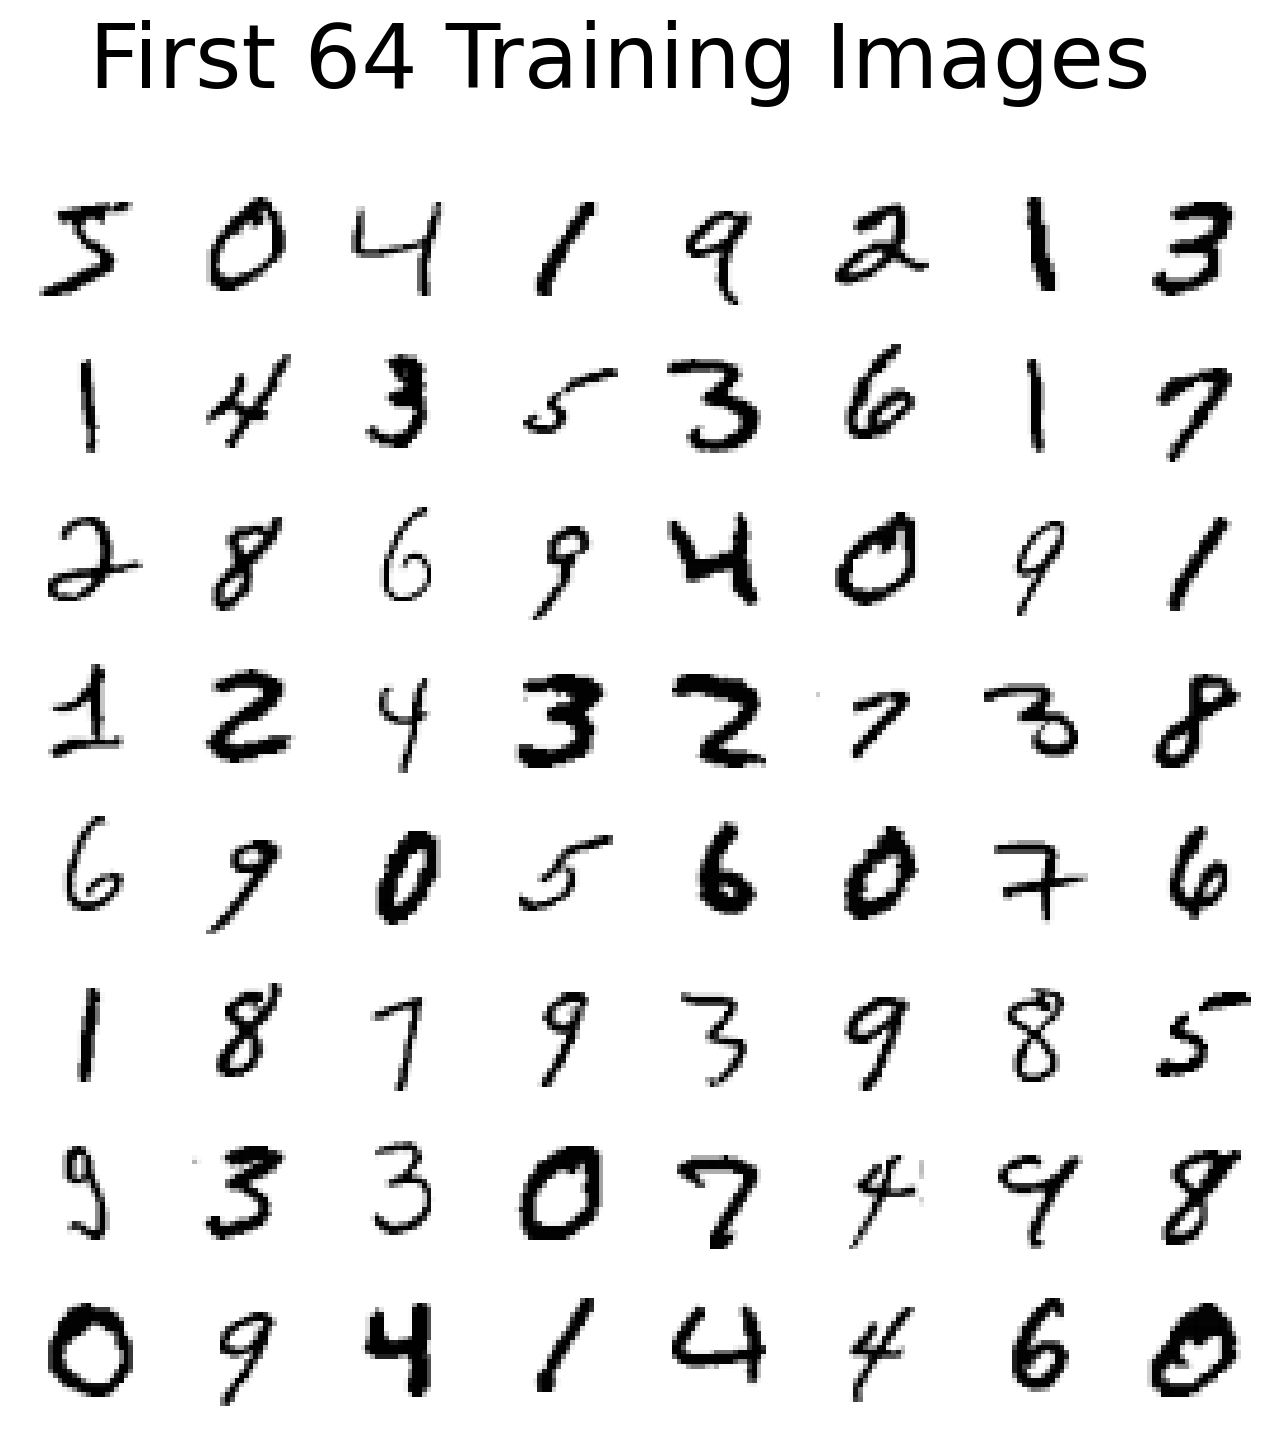

In [4]:
def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[:,(N)*i+j].reshape((28, 28)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=32)

plot_digits(Xtraindata, 8, "First 64 Training Images" )


# Task 1

In [5]:
## Reshape each image (already done) and stack the vectors into matrices X_train and X_test:

X_train = Xtraindata.T
print(X_train.shape)

X_test = Xtestdata.T
print(X_test.shape)

(60000, 784)
(10000, 784)


In [6]:
## Perform PCA analysis of the digit images in the training set:
pca = PCA()
X_fit = pca.fit(X_train)

(784, 784)
(16, 784)


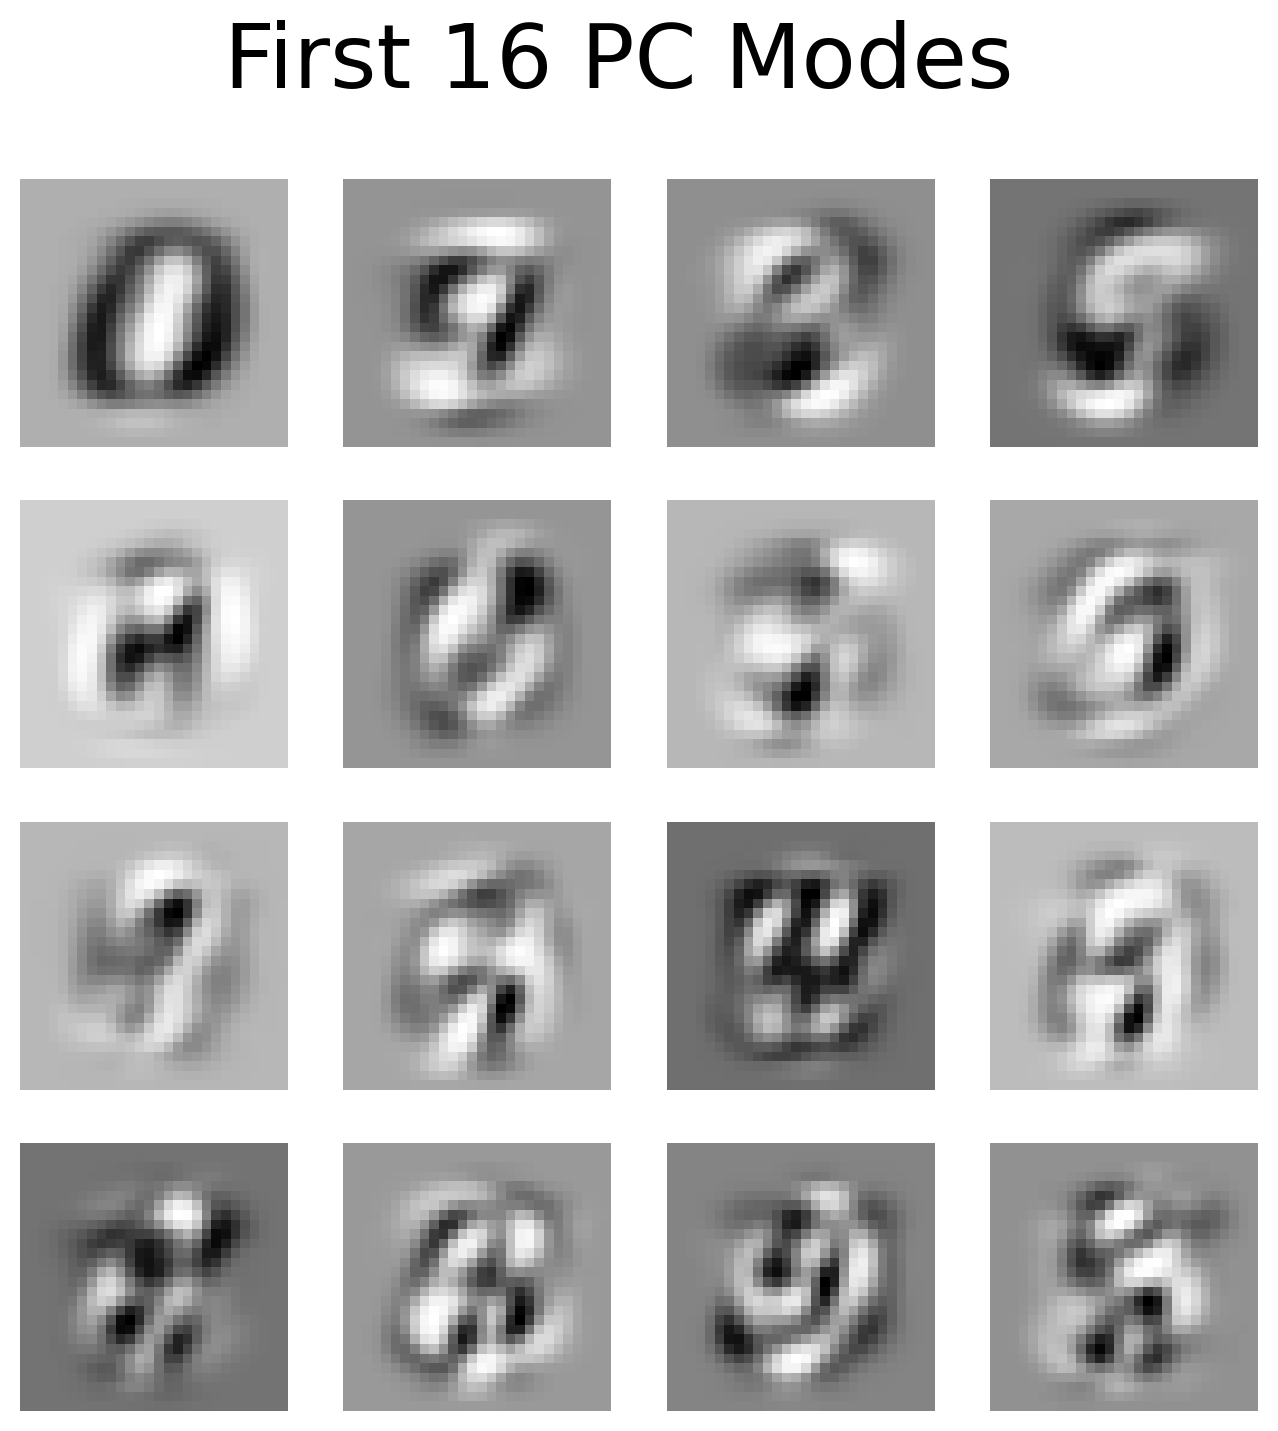

In [7]:
## Plot the first 16 PC modes as 28 x 28 images:

# Get all the PC modes
V = X_fit.components_
print(V.shape)

# Select the first 16
V_16 = V[:16, :]
print(V_16.shape)

# Plot the first 16 PC modes as 28 x 28 images using the plot_digits function
plot_digits(V_16.T, 4, "First 16 PC Modes")
plt.savefig('First 16 PC Modes.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)

# Task 2

In [8]:
## Inspect the cumulative energy of the singular values and determine k: the number of PC modes needed to approximate 85% of the energy of X_train:

# Get the singular values of the matrix X_train
s = X_fit.singular_values_
print(s.shape)

# Calculate the contribution of each singular value to the Frobenius norm of the matrix s
E = np.power(s, 2) / np.sum(np.power(s, 2))

# Find k: the number of PC modes needed to approximate 85% of the energy of X_train
for t in np.array([0.85]):
    energy = 0
    index = 0
    while energy < t:
        energy = np.cumsum(E)[index]
        if energy < t:
            index += 1
    print("k = {} PC modes needed to approximate {}% of X_train".format(index + 1, int(100 * t))) # add 1 because the number of modes = index + 1

(784,)
k = 59 PC modes needed to approximate 85% of X_train


(60000, 59)
(60000, 784)


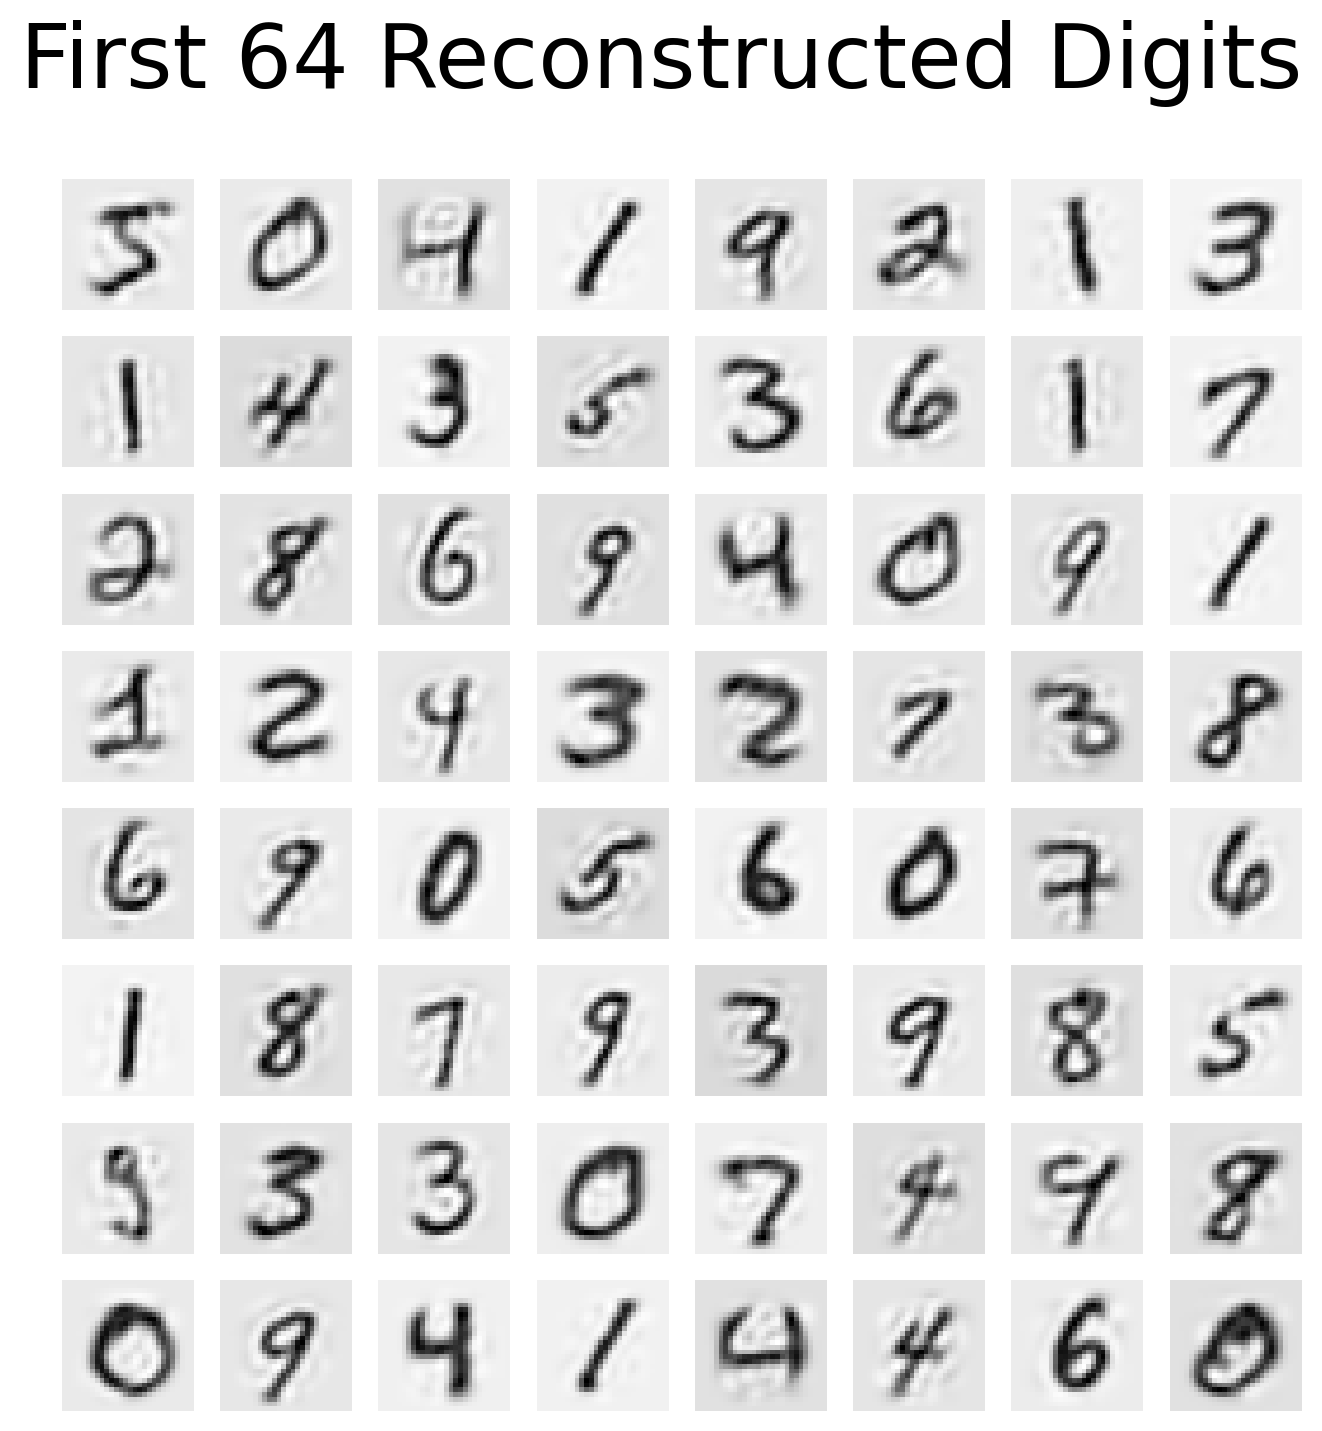

In [9]:
## Inspect several approximated digit images reconstructed from 59 PC modes and plot them to make sure that the image reconstruction using truncated modes is reasonable.

# Reduce the dimension of X_train from 784 to 59
pca59 = PCA(n_components = 59)
X_new = pca59.fit_transform(X_train)
print(X_new.shape)

# Reconstruct X_train from the above 59-dimensional approximation
X_old = pca59.inverse_transform(X_new)
print(X_old.shape)

plot_digits(X_old.T, 8, "First 64 Reconstructed Digits")
plt.savefig('First 64 Reconstructed Digits.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)

# Task 3

In [10]:
# Rename ytrainlabels and ytestlabels as y_train and y_test:

y_train = ytrainlabels
print(y_train.shape)
print(X_train.shape)

y_test = ytestlabels
print(y_test.shape)
print(X_test.shape)

(60000,)
(60000, 784)
(10000,)
(10000, 784)


In [11]:
# Write a function that selects a subset of particular digits (all samples of them) from X_train, y_train, X_test, and y_test, and returns the subset as new matrices X_subtrain, y_subtrain, X_subtest, y_subtest:

def subdigits(digit_array):
    
    # Find the indices of y_train and y_test where the desired digits lie
    list_of_idx_train = []
    list_of_idx_test = []
    for digit in digit_array:
        idx_train = np.where(y_train == digit)
        list_of_idx_train.append(idx_train)
        
        idx_test = np.where(y_test == digit)
        list_of_idx_test.append(idx_test)
    
    # If the user provides an empty array, return the full data set
    if len(digit_array) == 0:
        return X_train, y_train, X_test, y_test
    
    # With one desired digit, return the indices associated with that digit
    if len(digit_array) == 1:
        together_train = list_of_idx_train[0]
        together_test = list_of_idx_test[0]
    
    # With two or more desired digits, concatenate their indices
    if len(digit_array) >= 2:
        together_train = np.concatenate((list_of_idx_train[0], list_of_idx_train[1]), axis = 1)
        together_test = np.concatenate((list_of_idx_test[0], list_of_idx_test[1]), axis = 1)
    
    # Here, I had to make a subtle change so the array dimensions work out right
    together_train = together_train[0]
    together_test = together_test[0]
    
    # With more than two desired digits, continue to concatenate the indices
    if len(digit_array) > 2:
        for k in range(len(digit_array) - 2):
            together_train = np.concatenate((together_train, list_of_idx_train[k + 2][0]))
            
            together_test = np.concatenate((together_test, list_of_idx_test[k + 2][0]))
    
    # This will make it so the subsetted arrays retain the order that the digits appeared in the original arrays
    together_train = sorted(together_train)
    together_test = sorted(together_test)
    
# Use logical indexing to subset the arrays accordingly
    return X_train[together_train, :], y_train[together_train], X_test[together_test, :], y_test[together_test]

# Task 4

## First digit pair: 1, 8

In [12]:
# Select the digits 1 and 8 using the function from Task 3:

X_subtrain, y_subtrain, X_subtest, y_subtest = subdigits([1, 8])

print(y_subtrain.shape)
print(X_subtrain.shape)
print(y_subtrain[:20])

print(y_subtest.shape)
print(X_subtest.shape)
print(y_subtest[:20])

(12593,)
(12593, 784)
[1 1 1 1 8 1 1 8 1 8 8 8 1 1 1 1 1 1 8 8]
(2109,)
(2109, 784)
[1 1 1 1 1 1 1 1 1 1 8 1 8 1 1 1 1 8 8 8]


In [13]:
# Project the subsetted data onto 59-PC modes:

X_subtrain_59 = pca59.fit_transform(X_subtrain)
print(X_subtrain_59.shape)

X_subtest_59 = pca59.transform(X_subtest)
print(X_subtest_59.shape)

(12593, 59)
(2109, 59)


In [14]:
# Apply the Ridge classifier (linear) to distinguish between 1 and 8:

from sklearn.linear_model import RidgeClassifierCV
RidgeCL = RidgeClassifierCV()
RidgeCL.fit(X_subtrain_59, y_subtrain)

RidgeClassifierCV()

In [15]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(RidgeCL.score(X_subtrain_59, y_subtrain)))
print("Testing Score: {}".format(RidgeCL.score(X_subtest_59, y_subtest)))

Training Score: 0.965377590725006
Testing Score: 0.9805595068752964


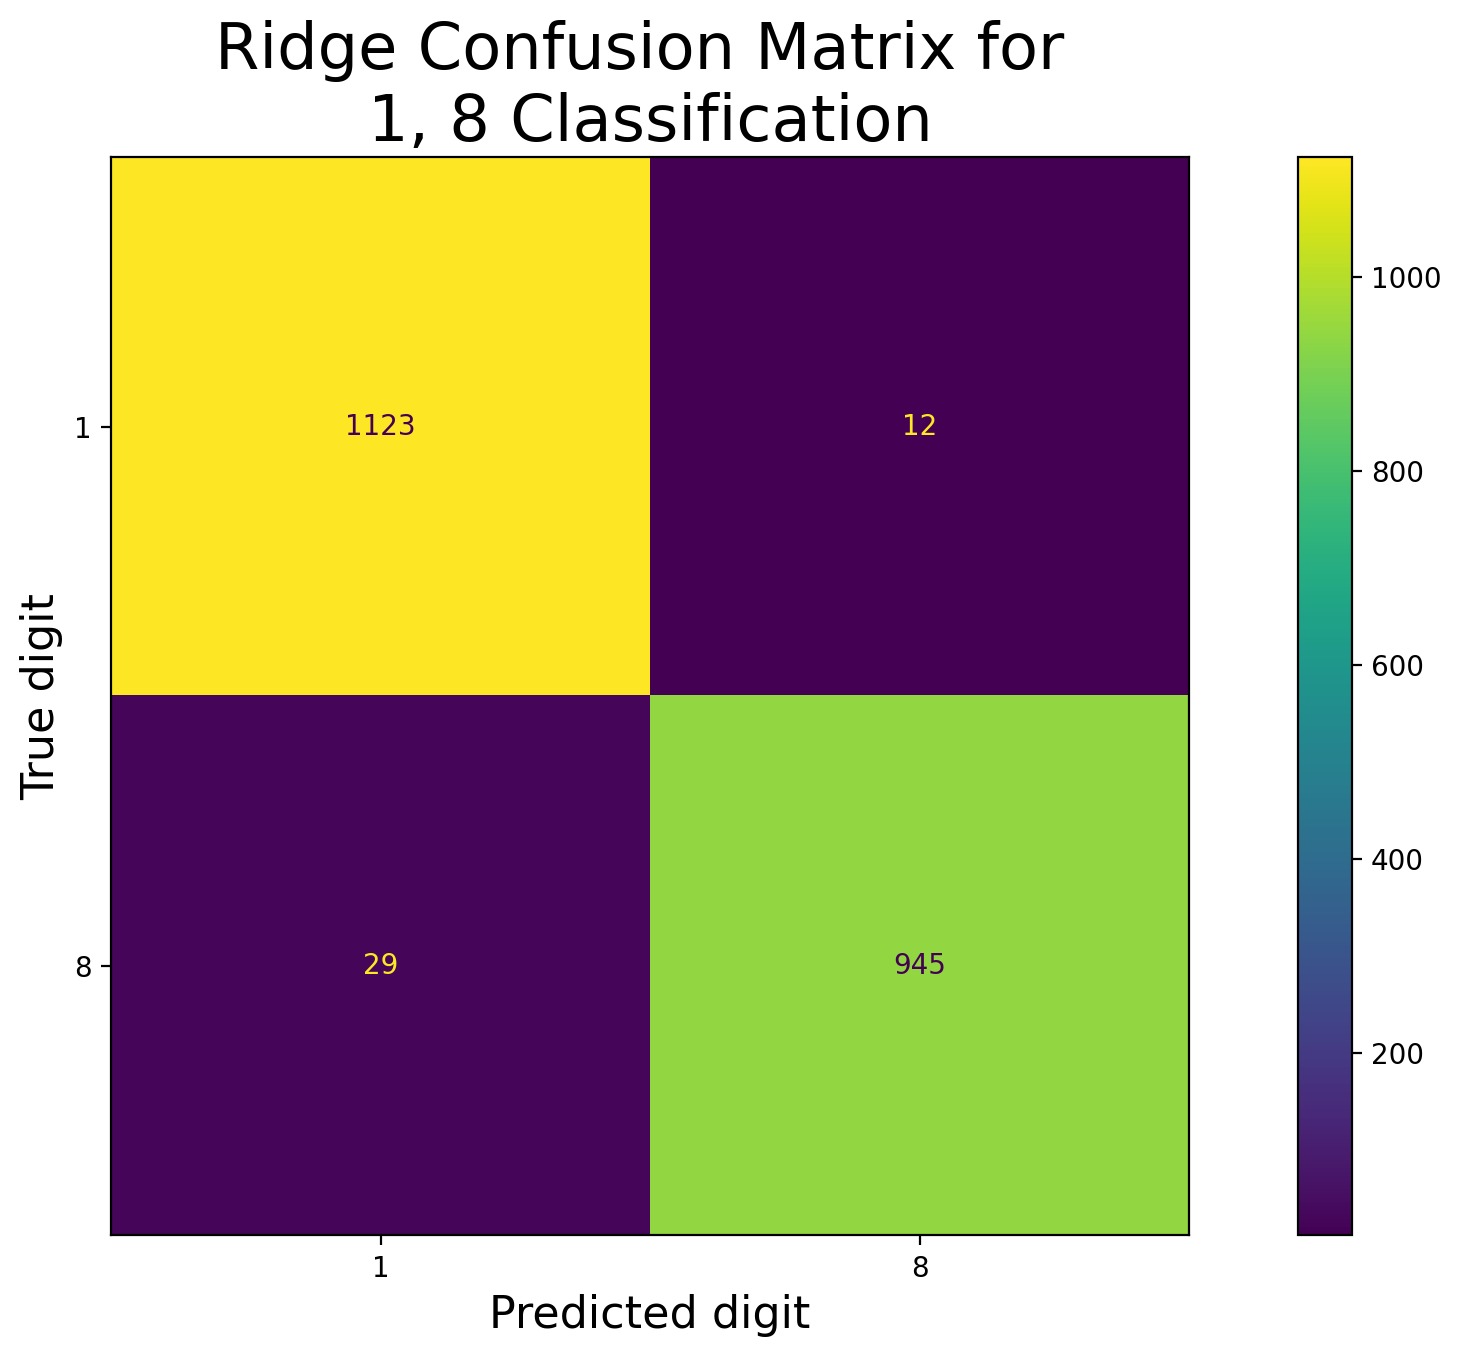

In [16]:
# plot the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

y_pred = RidgeCL.predict(X_subtest_59)

fig, ax = plt.subplots(figsize = (14, 7))
ConfusionMatrixDisplay.from_predictions(y_subtest, y_pred, ax = ax)
# ax.xaxis.set_ticklabels(y_names)
# ax.yaxis.set_ticklabels(y_names)
_ = ax.set_ylabel('True digit', fontsize = 16)
_ = ax.set_xlabel('Predicted digit', fontsize = 16)
_ = ax.set_title("Ridge Confusion Matrix for \n1, 8 Classification", fontsize = 23)

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RidgeCL, X_subtrain_59, y_subtrain, cv = 5)
print("scores =", scores)

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

scores = [0.96228662 0.95990472 0.96585947 0.96108022 0.96822875]
0.9634719578384578 accuracy with a standard deviation of 0.003104122477661761


# Task 5

## Second digit pair: 3, 8

In [18]:
# Select the digits 3 and 8 using the function from Task 3:

X_subtrain, y_subtrain, X_subtest, y_subtest = subdigits([3, 8])

print(y_subtrain.shape)
print(X_subtrain.shape)
print(y_subtrain[:20])

print(y_subtest.shape)
print(X_subtest.shape)
print(y_subtest[:20])

(11982,)
(11982, 784)
[3 3 3 8 3 3 8 8 3 8 3 3 8 3 8 3 8 8 3 3]
(1984,)
(1984, 784)
[3 3 3 3 3 8 3 3 3 8 3 3 3 8 3 8 8 3 8 3]


In [19]:
# Project the subsetted data onto 59-PC modes:

X_subtrain_59 = pca59.fit_transform(X_subtrain)
print(X_subtrain_59.shape)

X_subtest_59 = pca59.transform(X_subtest)
print(X_subtest_59.shape)

(11982, 59)
(1984, 59)


In [20]:
# Apply the Ridge classifier (linear) to distinguish between 3 and 8:

RidgeCL.fit(X_subtrain_59, y_subtrain)

RidgeClassifierCV()

In [21]:
# Estimate accuracy for Training and Testing:

print("Training Score: {}".format(RidgeCL.score(X_subtrain_59, y_subtrain)))
print("Testing Score: {}".format(RidgeCL.score(X_subtest_59, y_subtest)))

Training Score: 0.9614421632448673
Testing Score: 0.9632056451612904


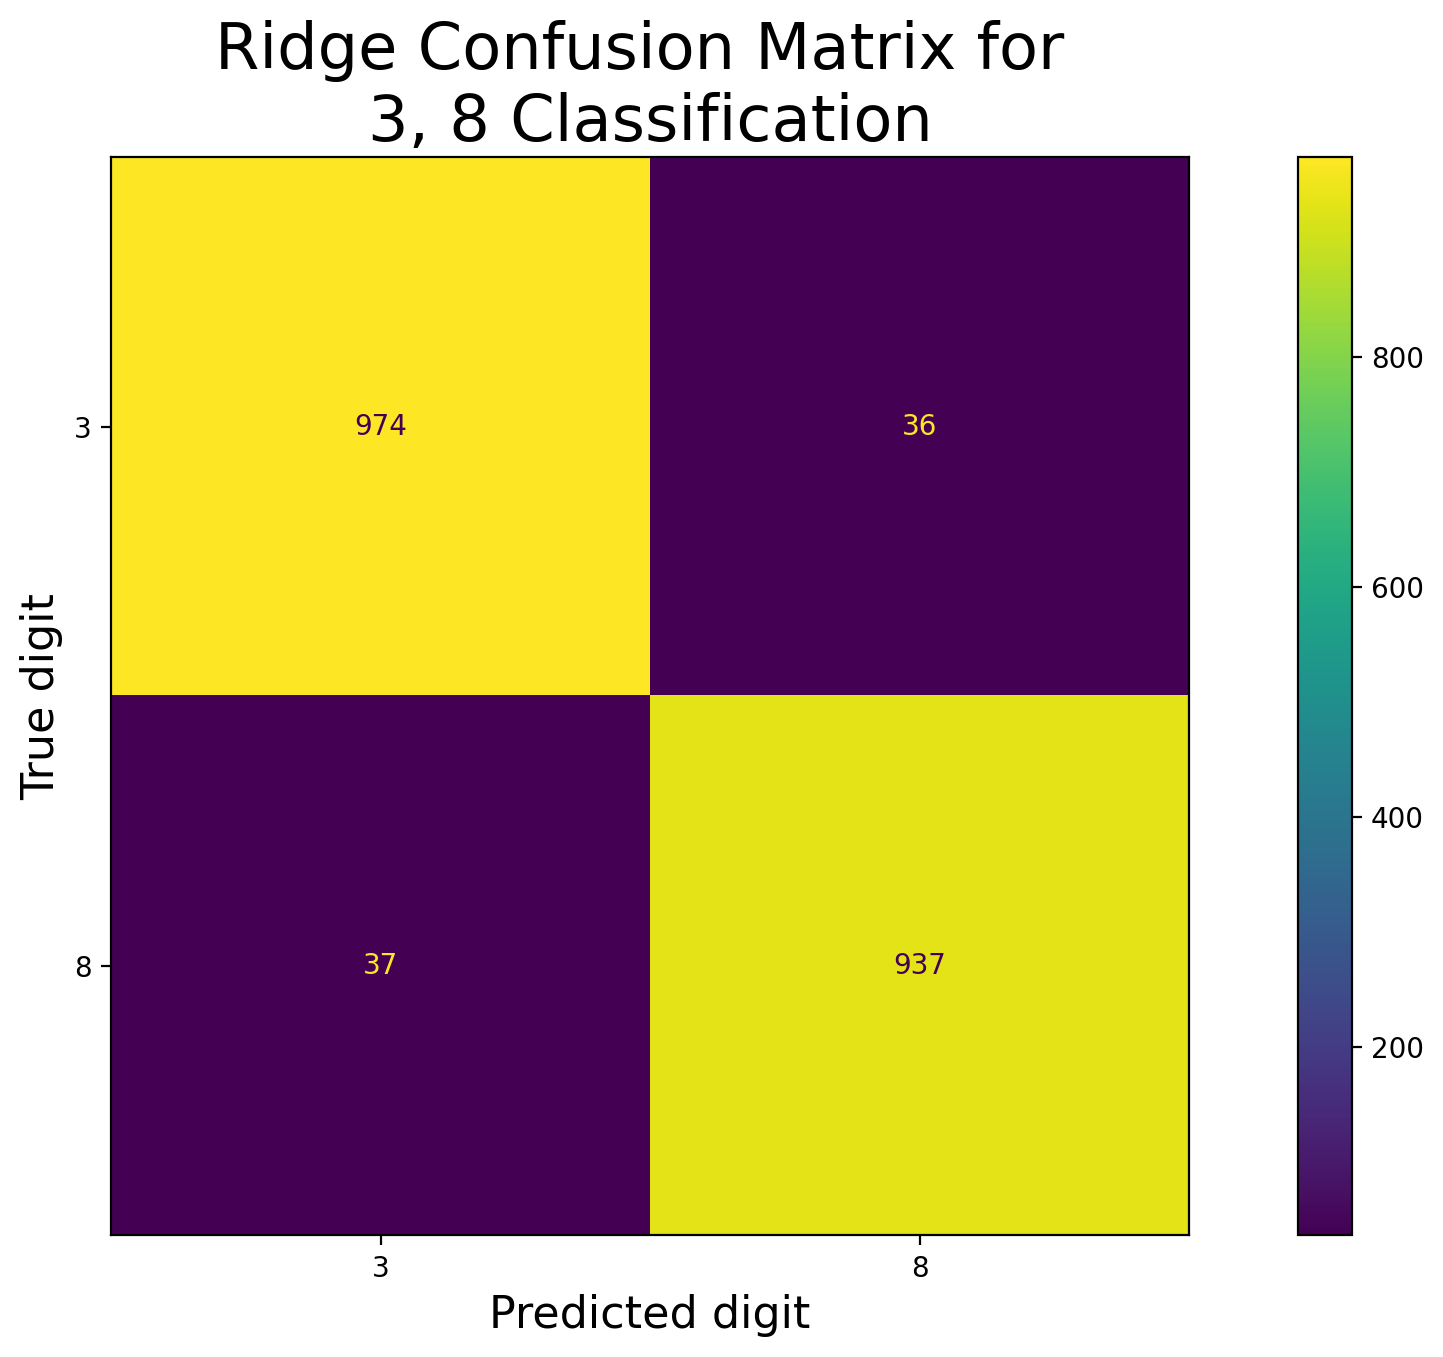

In [22]:
# Plot the confusion matrix:

y_pred = RidgeCL.predict(X_subtest_59)

fig, ax = plt.subplots(figsize = (14, 7))
ConfusionMatrixDisplay.from_predictions(y_subtest, y_pred, ax = ax)
# ax.xaxis.set_ticklabels(y_names)
# ax.yaxis.set_ticklabels(y_names)
_ = ax.set_ylabel('True digit', fontsize = 16)
_ = ax.set_xlabel('Predicted digit', fontsize = 16)
_ = ax.set_title(f"Ridge Confusion Matrix for \n3, 8 Classification", fontsize = 23)

In [23]:
scores = cross_val_score(RidgeCL, X_subtrain_59, y_subtrain, cv = 5)
print("scores =", scores)

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

scores = [0.95661243 0.9541093  0.96786311 0.95325543 0.96368948]
0.9591059497716609 accuracy with a standard deviation of 0.005711554611829214


## Third digit pair: 2, 7

In [24]:
# Select the digits 2 and 7 using the function from Task 3:

X_subtrain, y_subtrain, X_subtest, y_subtest = subdigits([2, 7])

print(y_subtrain.shape)
print(X_subtrain.shape)
print(y_subtrain[:20])

print(y_subtest.shape)
print(X_subtest.shape)
print(y_subtest[:20])

(12223,)
(12223, 784)
[2 7 2 2 2 7 7 7 7 7 2 7 2 7 7 7 7 7 2 2]
(2060,)
(2060, 784)
[7 2 7 7 7 2 7 2 7 2 2 7 7 7 2 7 2 7 7 2]


In [25]:
# Project the subsetted data onto 59-PC modes:

X_subtrain_59 = pca59.fit_transform(X_subtrain)
print(X_subtrain_59.shape)

X_subtest_59 = pca59.transform(X_subtest)
print(X_subtest_59.shape)

(12223, 59)
(2060, 59)


In [26]:
# Apply the Ridge classifier (linear) to distinguish between 2 and 7:

RidgeCL.fit(X_subtrain_59, y_subtrain)

RidgeClassifierCV()

In [27]:
# Estimate accuracy for Training and Testing:

print("Training Score: {}".format(RidgeCL.score(X_subtrain_59, y_subtrain)))
print("Testing Score: {}".format(RidgeCL.score(X_subtest_59, y_subtest)))

Training Score: 0.9810193896752025
Testing Score: 0.9733009708737864


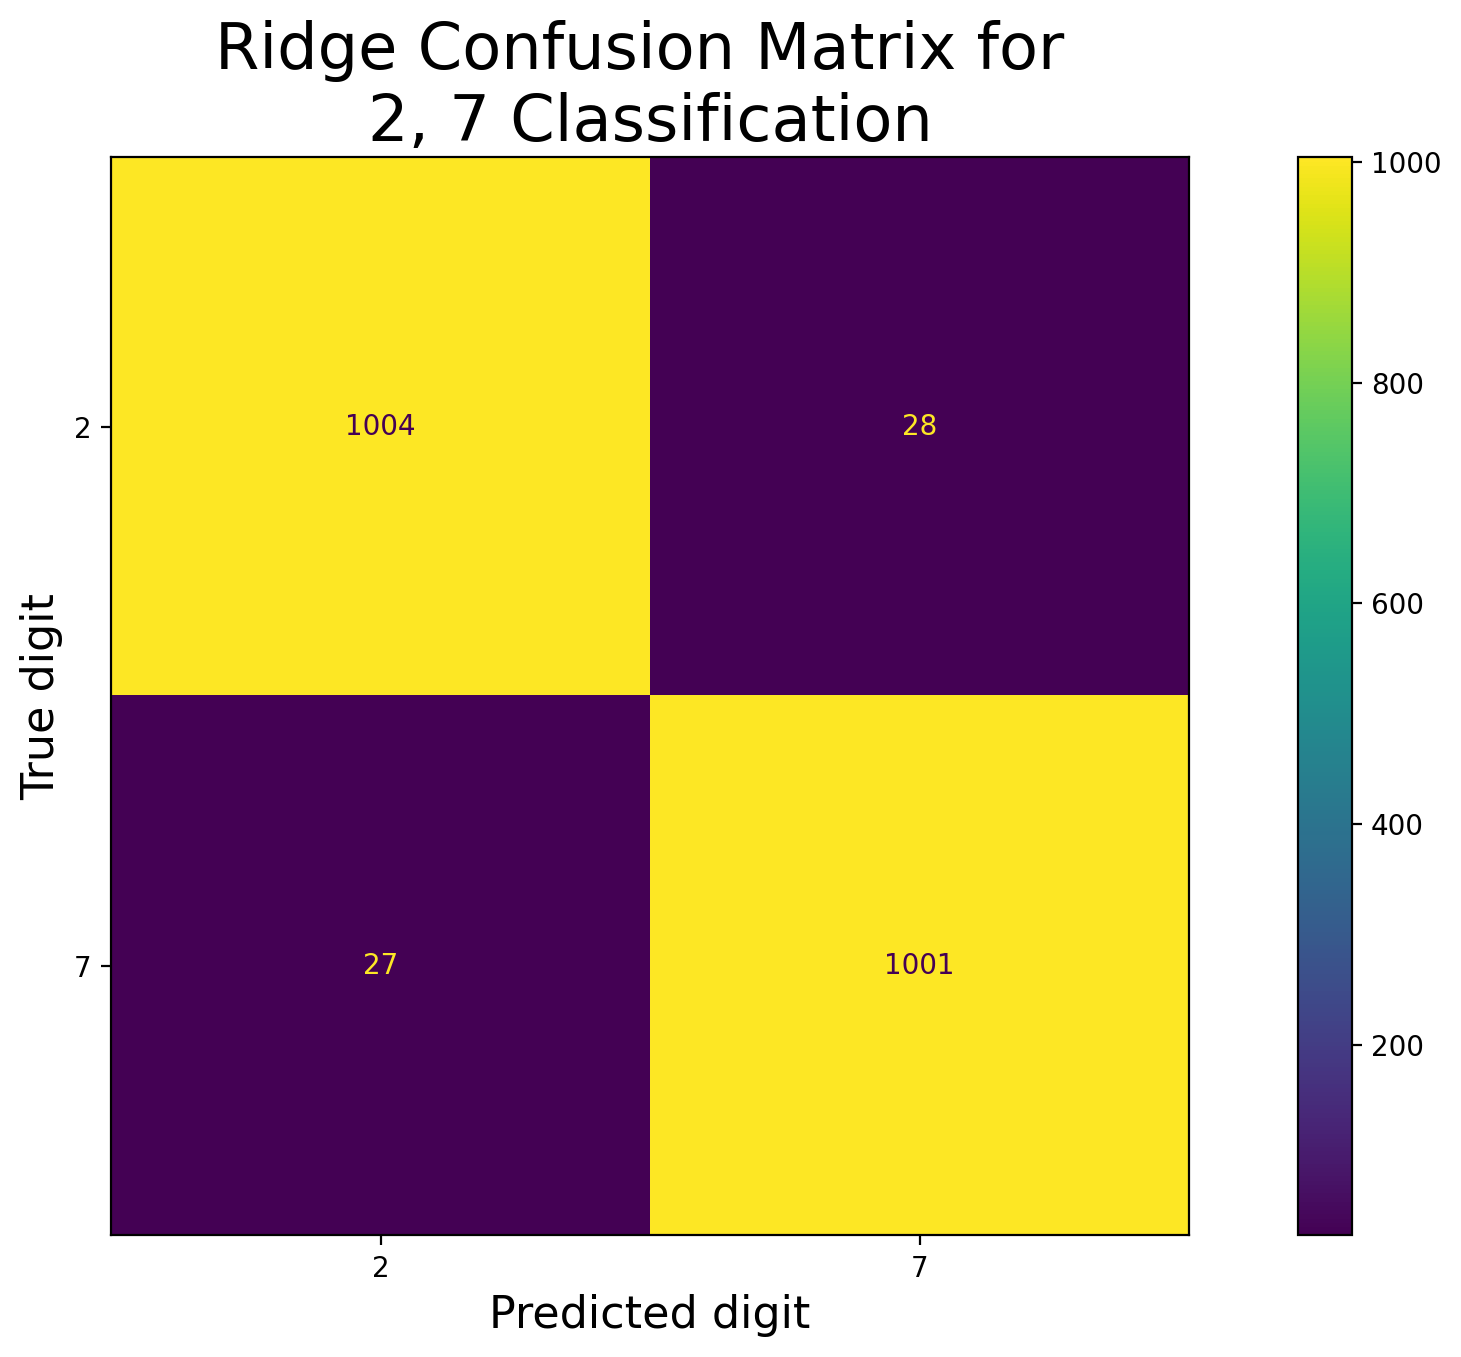

In [28]:
# Plot the confusion matrix:

y_pred = RidgeCL.predict(X_subtest_59)

fig, ax = plt.subplots(figsize = (14, 7))
ConfusionMatrixDisplay.from_predictions(y_subtest, y_pred, ax = ax)
# ax.xaxis.set_ticklabels(y_names)
# ax.yaxis.set_ticklabels(y_names)
_ = ax.set_ylabel('True digit', fontsize = 16)
_ = ax.set_xlabel('Predicted digit', fontsize = 16)
_ = ax.set_title(f"Ridge Confusion Matrix for \n2, 7 Classification", fontsize = 23)

In [29]:
scores = cross_val_score(RidgeCL, X_subtrain_59, y_subtrain, cv = 5)
print("scores =", scores)

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

scores = [0.98241309 0.9795501  0.97873211 0.97913257 0.98486088]
0.9809377499757346 accuracy with a standard deviation of 0.0023501790346820784


# Task 6

## Multi-class classification with all digits 0-9

### Classifier 1: Ridge

In [30]:
# Project the data onto 59-PC modes:

X_train_59 = pca59.fit_transform(X_train)
print(X_train_59.shape)

X_test_59 = pca59.transform(X_test)
print(X_test_59.shape)

(60000, 59)
(10000, 59)


In [31]:
# Apply the Ridge classifier (linear) to distinguish between all digits 0-9:

RidgeCL.fit(X_train_59, y_train)

RidgeClassifierCV()

In [32]:
# Estimate accuracy for Training and Testing:

print("Training Score: {}".format(RidgeCL.score(X_train_59, y_train)))
print("Testing Score: {}".format(RidgeCL.score(X_test_59, y_test)))

Training Score: 0.8458666666666667
Testing Score: 0.857


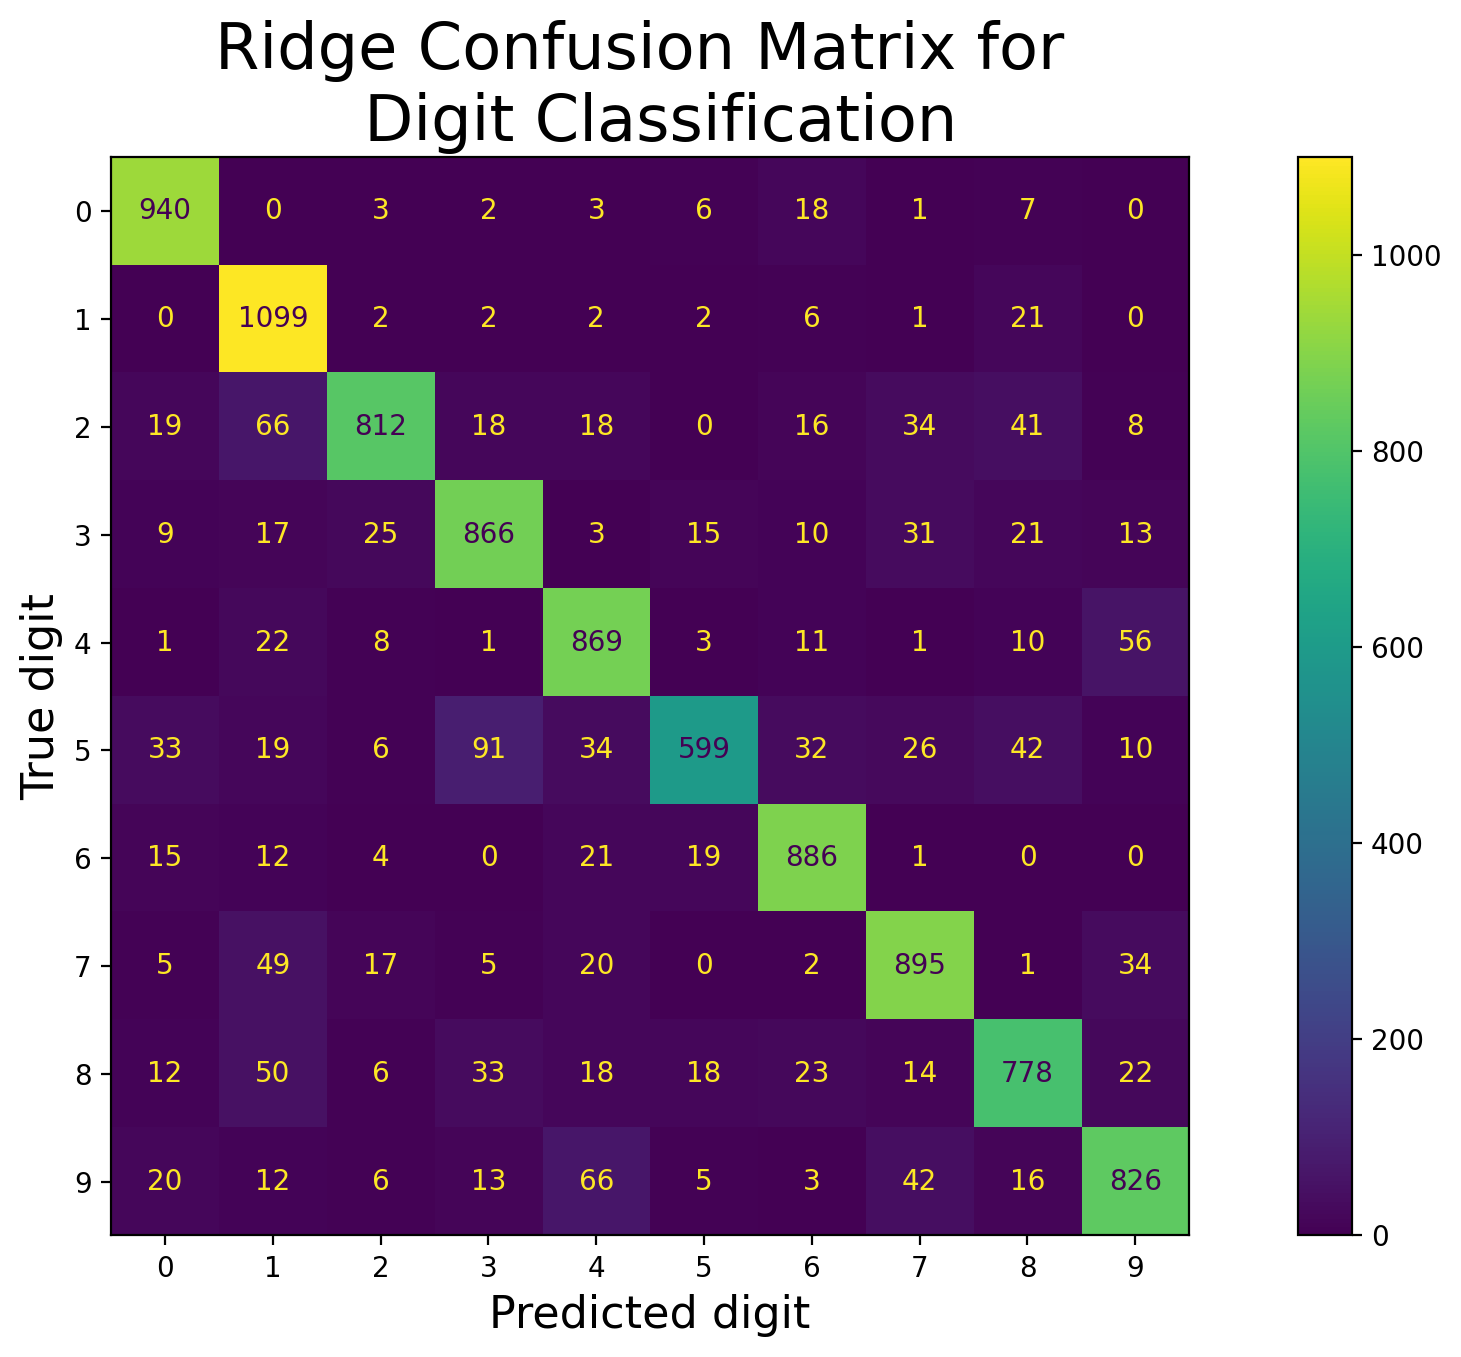

In [33]:
# Plot the confusion matrix:

y_pred = RidgeCL.predict(X_test_59)

fig, ax = plt.subplots(figsize = (14, 7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax)
# ax.xaxis.set_ticklabels(y_names)
# ax.yaxis.set_ticklabels(y_names)
_ = ax.set_ylabel('True digit', fontsize = 16)
_ = ax.set_xlabel('Predicted digit', fontsize = 16)
_ = ax.set_title(f"Ridge Confusion Matrix for \n Digit Classification", fontsize = 23)

plt.savefig('Ridge Confusion Matrix.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)

In [34]:
scores = cross_val_score(RidgeCL, X_train_59, y_train, cv = 5)
print("scores =", scores)

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

scores = [0.84958333 0.833      0.83608333 0.84016667 0.86066667]
0.8439 accuracy with a standard deviation of 0.010072432123816446


### Classifier 2: KNN

In [35]:
# Apply the KNN classifier to distinguish between all digits 0-9:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

KNNCL = KNeighborsClassifier(n_neighbors = 3)
KNNCL.fit(X_train_59, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
# Estimate accuracy for Training and Testing

print("Training Score: {}".format(KNNCL.score(X_train_59, y_train)))
print("Testing Score: {}".format(KNNCL.score(X_test_59, y_test)))

Training Score: 0.9891166666666666
Testing Score: 0.9755


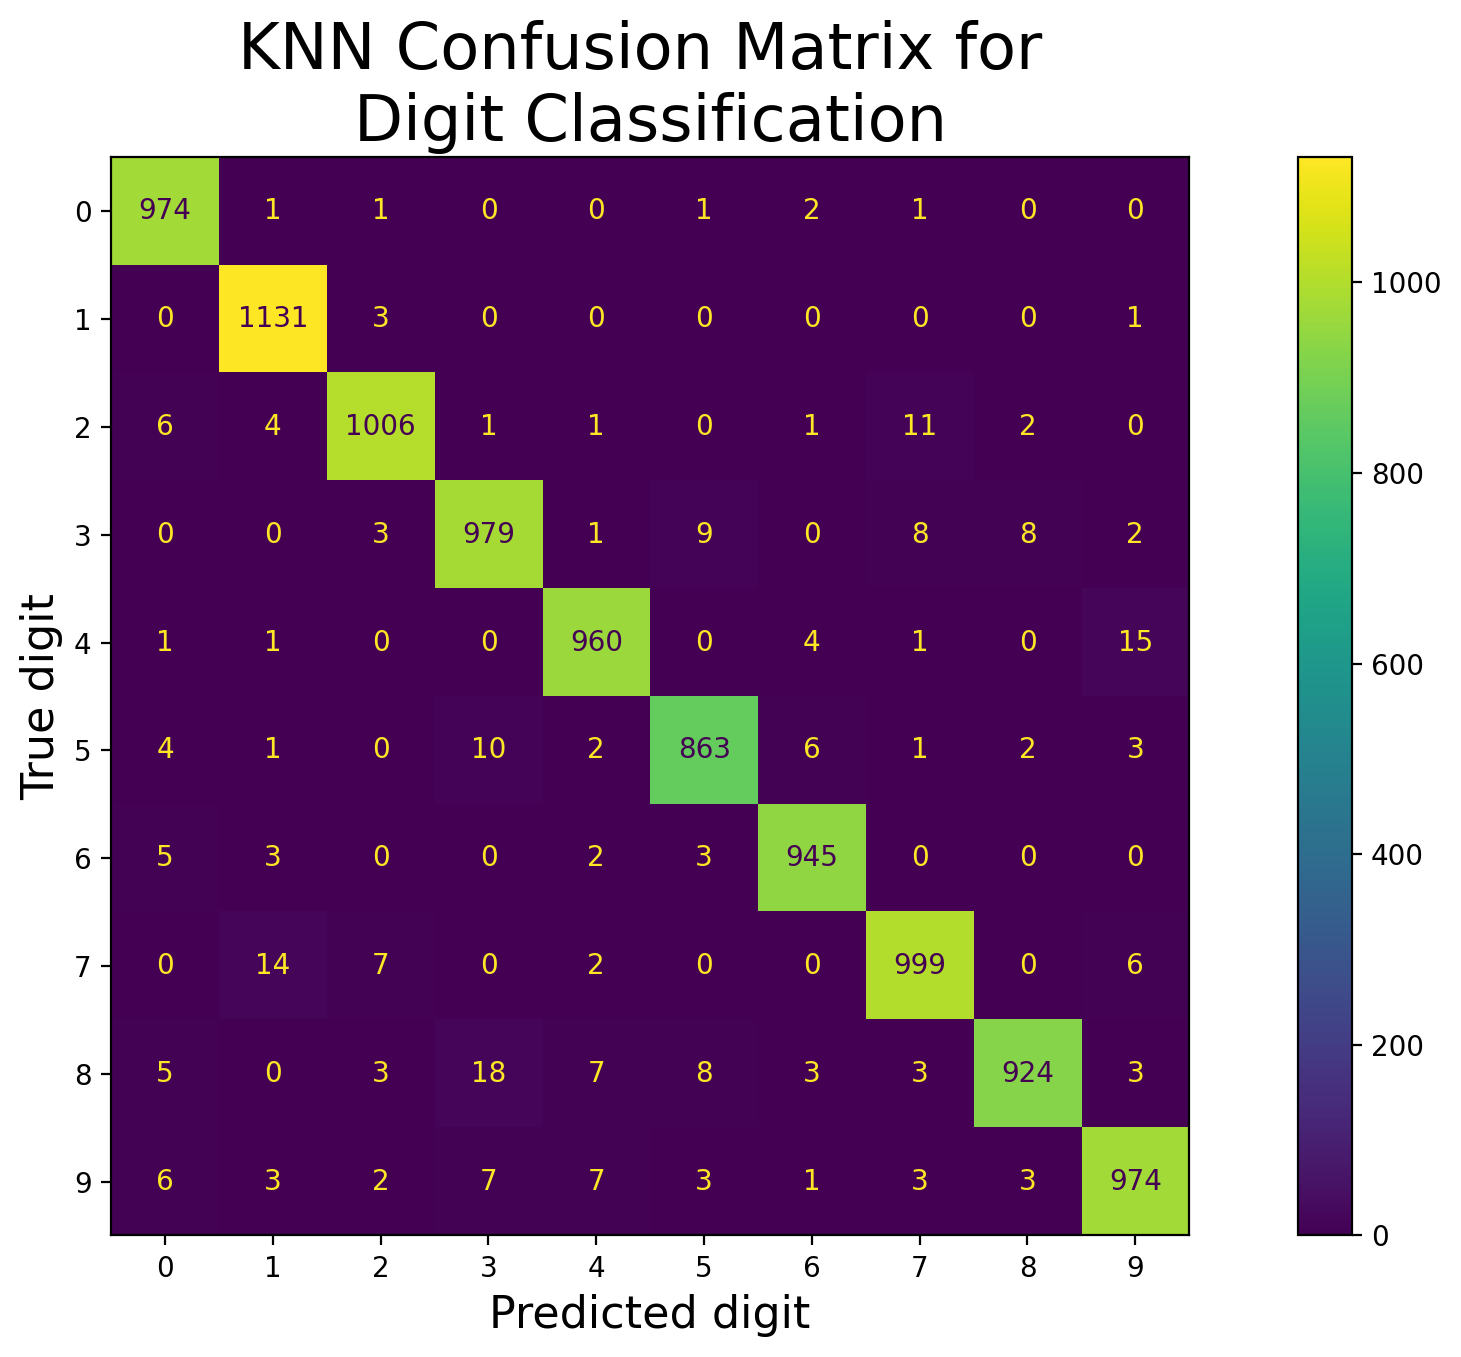

In [37]:
# Plot the confusion matrix

y_pred = KNNCL.predict(X_test_59)

fig, ax = plt.subplots(figsize=(14, 7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax)
# ax.xaxis.set_ticklabels(y_names)
# ax.yaxis.set_ticklabels(y_names)
_ = ax.set_ylabel('True digit', fontsize = 16)
_ = ax.set_xlabel('Predicted digit', fontsize = 16)
_ = ax.set_title(
    f"KNN Confusion Matrix for \nDigit Classification", fontsize = 23
)

plt.savefig('KNN Confusion Matrix.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)

In [48]:
# k_values = [i for i in range (1, 10)]
k_values = [3]
scores = []

for k in k_values:
    KNNCLk = KNeighborsClassifier(n_neighbors = k)
    scorescv = cross_val_score(KNNCLk, X_train_59, y_train, cv = 5)
    print("{} accuracy with a standard deviation of {}".format(scorescv.mean(), scorescv.std()))
    scores.append(scorescv.mean())

# print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

0.9754833333333334 accuracy with a standard deviation of 0.0012989311845599176


In [39]:
# import seaborn as sns

# sns.lineplot(x = k_values, y = scores, marker = 'o')
# plt.xlabel("K Values")
# plt.ylabel("Accuracy Score")

In [40]:
# kopt = k_values[np.argmax(scores)]

# print("Optimal k = {} ".format(kopt))

In [41]:
# KNNCL = KNeighborsClassifier(n_neighbors = kopt)
# KNNCL.fit(X_train_59, y_train)

# from sklearn.metrics import classification_report

# y_pred_tr = KNNCL.predict(X_train_59)
# y_pred_test = KNNCL.predict(X_test_59)

# print(classification_report(y_pred_tr, y_train))
# print(classification_report(y_pred_test, y_test))

### Classifier 3: LDA

In [42]:
# Apply the LDA classifier to distinguish between all digits 0-9:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDACL = LinearDiscriminantAnalysis()
LDACL.fit(X_train_59, y_train)

LinearDiscriminantAnalysis()

In [43]:
# Estimate accuracy for Training and Testing

print("Training Score: {}".format(LDACL.score(X_train_59, y_train)))
print("Testing Score: {}".format(LDACL.score(X_test_59, y_test)))

Training Score: 0.8664666666666667
Testing Score: 0.876


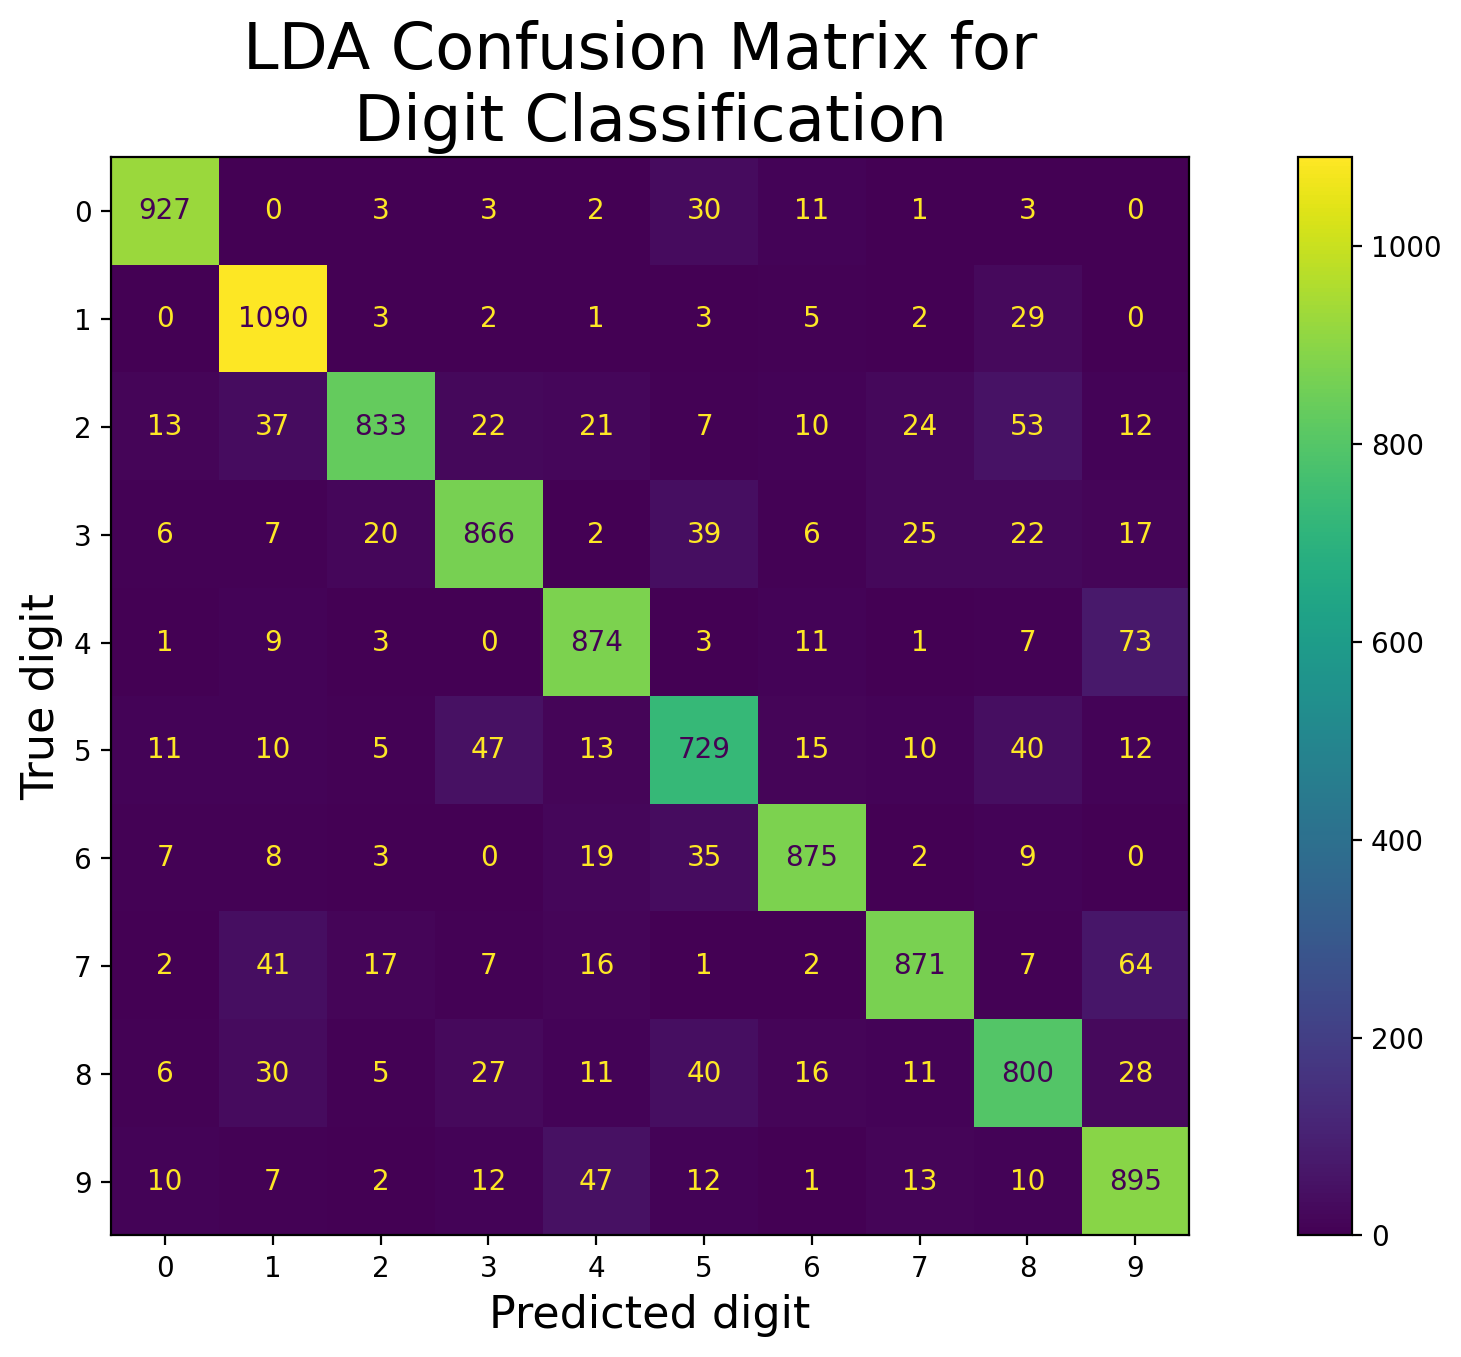

In [44]:
# Plot the confusion matrix

y_pred = LDACL.predict(X_test_59)

fig, ax = plt.subplots(figsize=(14, 7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax)
# ax.xaxis.set_ticklabels(y_names)
# ax.yaxis.set_ticklabels(y_names)
_ = ax.set_ylabel('True digit', fontsize = 16)
_ = ax.set_xlabel('Predicted digit', fontsize = 16)
_ = ax.set_title(
    f"LDA Confusion Matrix for \nDigit Classification", fontsize = 23
)

plt.savefig('LDA Confusion Matrix.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)

In [45]:
scores = cross_val_score(LDACL, X_train_59, y_train, cv = 5)
print("scores =", scores)

print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))

scores = [0.87216667 0.85691667 0.85808333 0.85925    0.87841667]
0.8649666666666667 accuracy with a standard deviation of 0.008690288321517935


(60000, 9)


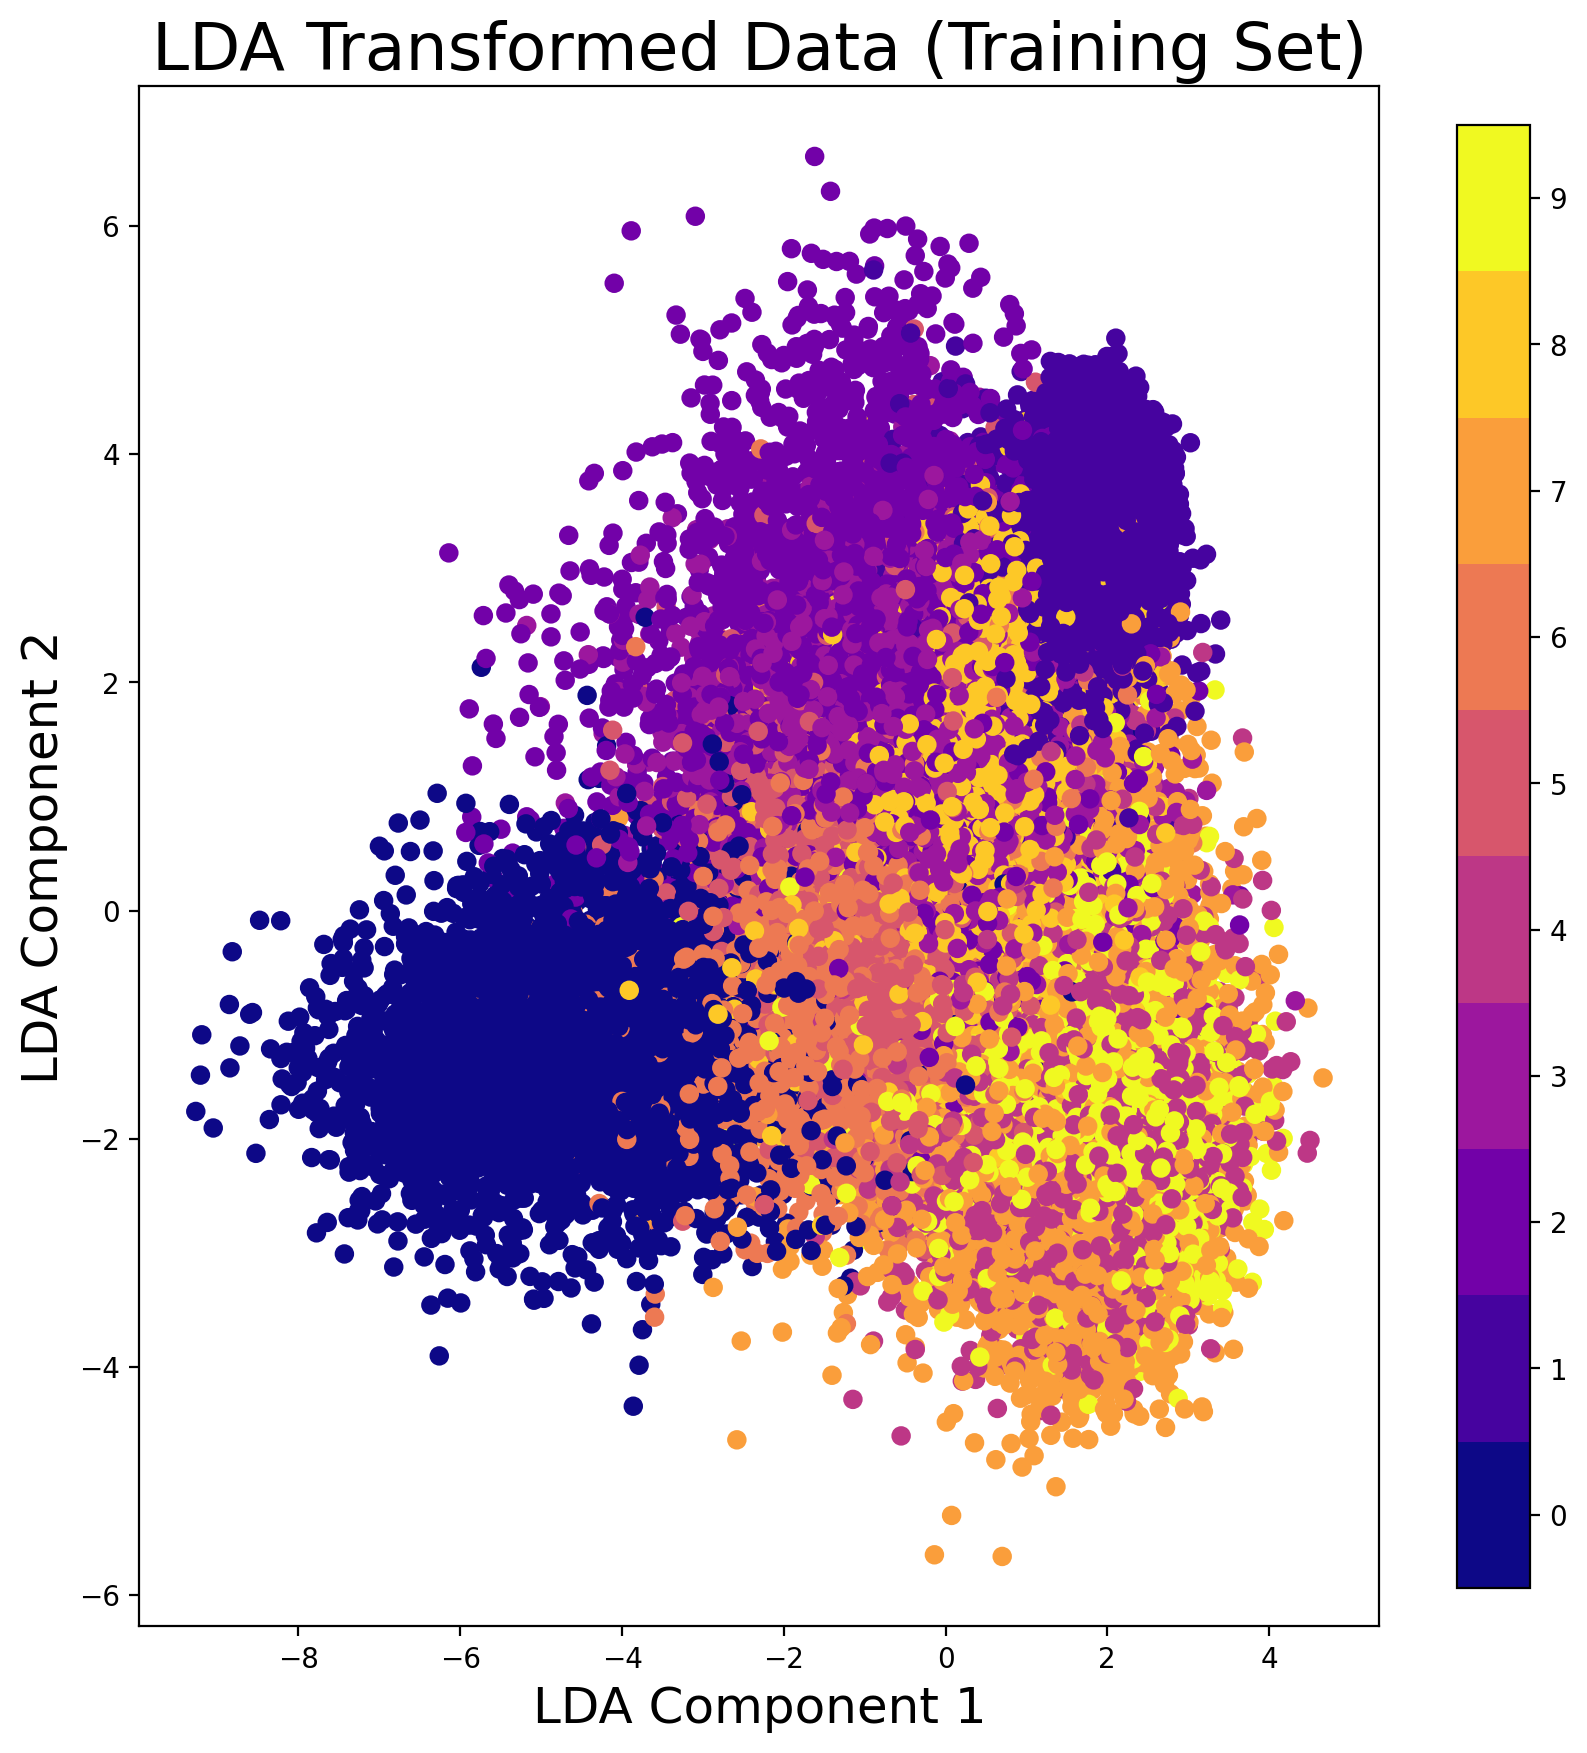

In [50]:
# Plot the X_train data in 2D LDA components

from matplotlib import colors

cmap = plt.cm.plasma
norm = colors.BoundaryNorm(np.arange(-0.5, 10, 1), cmap.N)

X_train_59_transformed = LDACL.transform(X_train_59)
print(X_train_59_transformed.shape)

plt.figure(figsize = (10, 10))
plt.tight_layout(pad = 5.0)
plt.scatter(X_train_59_transformed[:, 0], X_train_59_transformed[:, 1], c = y_train, cmap = cmap, norm = norm)
plt.xlabel('LDA Component 1', fontsize = 18)
plt.ylabel('LDA Component 2', fontsize = 18)
plt.title('LDA Transformed Data (Training Set)', fontsize = 24)
plt.colorbar(ticks = np.linspace(0, 9, 10), shrink = 0.95)
plt.savefig('LDA Transformed Data 2D.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)
plt.show()

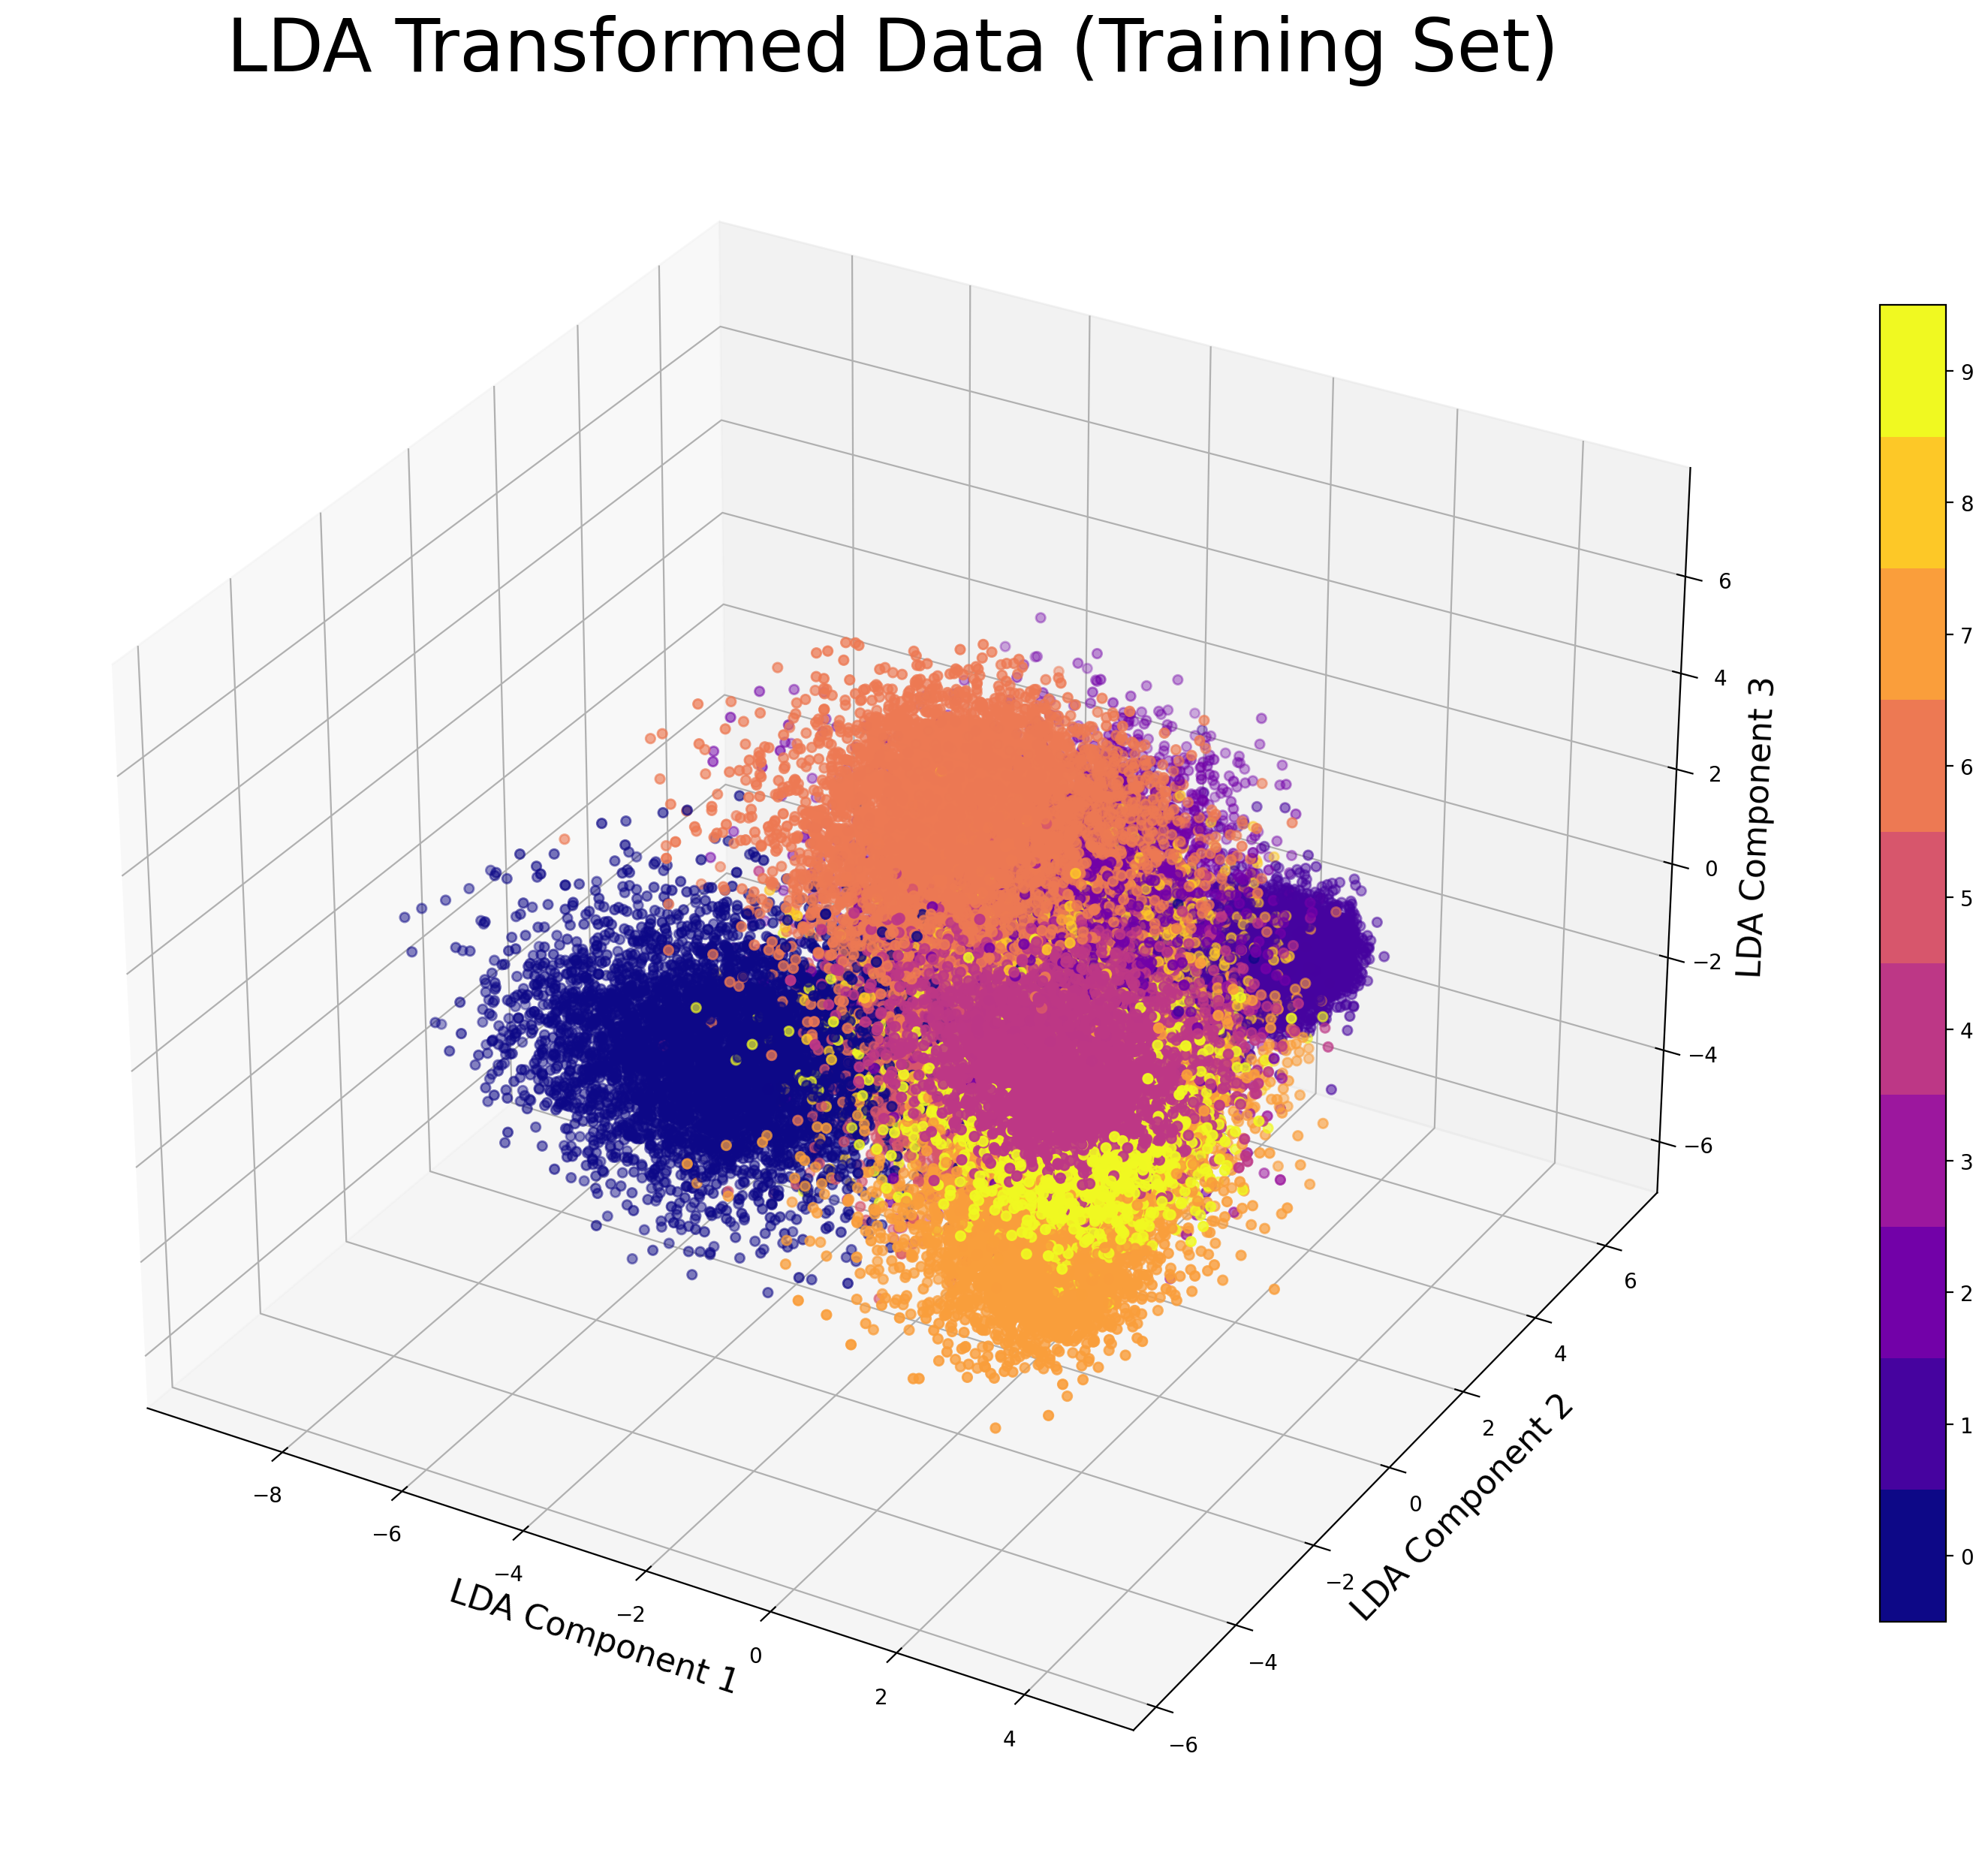

In [49]:
# Now plot the X_train data in 3D LDA components

fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection = '3d')
fig.tight_layout(pad = 5.0)
sc = ax.scatter(X_train_59_transformed[:, 0], X_train_59_transformed[:, 1], X_train_59_transformed[:, 2], c = y_train, cmap = cmap, norm = norm)
ax.set_xlabel('LDA Component 1', fontsize = 16)
ax.set_ylabel('LDA Component 2', fontsize = 16)
ax.set_zlabel('LDA Component 3', fontsize = 16)
ax.set_title('LDA Transformed Data (Training Set)', fontsize = 35)
plt.colorbar(sc, location = 'right', ticks = np.linspace(0, 9, 10), shrink = 0.6)
plt.savefig('LDA Transformed Data 3D.jpeg', format = 'jpeg', dpi = 600, pad_inches = 2)
plt.show()